## Description

The dataset is about information of sample customers of a bank

What's the challenge here?

Well, the bank has been seeing unusual churn rates (churn is when people leave the company), and they've seen customers leaving at unusually high rates

They want to understand what the problem is and they want to assess and address that problem.

So what happened in reality is that this bank actually observed their customers for a certain period of time, let's say six months.

They observed if during the six months they left the bank or stayed in the bank and they gathered these outcomes in this last dependent variable, and at the same time, you know, they got all these features.

## Gathering

**The features in the given dataset are:**

- rownumber: Row Numbers from 1 to 10000.

- customerid: A unique ID that identifies each customer.

- surname: The customer’s surname.

- creditscore: A credit score is a number between 300–850 that depicts a consumer's creditworthiness.

- geography: The country from which the customer belongs to.

- Gender: The customer’s gender: Male, Female

- Age: The customer’s current age, in years, at the time of being customer.

- tenure: The number of years for which the customer has been with the bank.

- balance: Bank balance of the customer.

- numofproducts: the number of bank products the customer is utilising.

- h0ascrcard: The number of credit cards given to the customer by the bank.

- isactivemember: Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")

- exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#For modeling
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score



df=pd.read_csv("../input/churn-modelling/Churn_Modelling.csv")


In [2]:
tf.__version__

'2.6.4'

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Does the dataset contains null values?
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#Does the dataset contains duplicated values?
df.duplicated().sum()

0

In [8]:
#Dropping first 3 columns becaues they will not be useful in either analysis or modeling
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

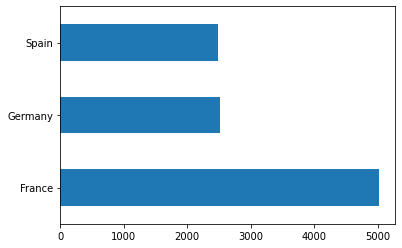

In [9]:
df.Geography.value_counts().plot(kind='barh');
df.Geography.value_counts()

Most of the bank customers are from france

Male      5457
Female    4543
Name: Gender, dtype: int64

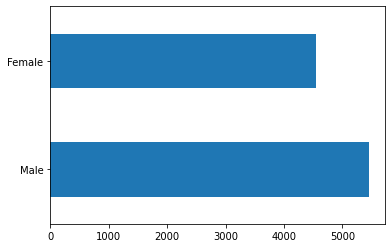

In [10]:
df.Gender.value_counts().plot(kind='barh');
df.Gender.value_counts()

Number of Males customers are higher than that of Females  

In [11]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

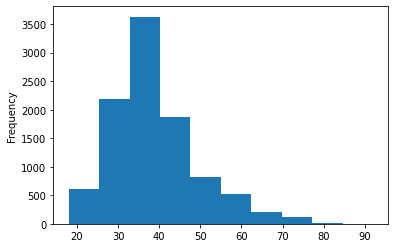

In [12]:
df.Age.plot(kind='hist');

1    5151
0    4849
Name: IsActiveMember, dtype: int64

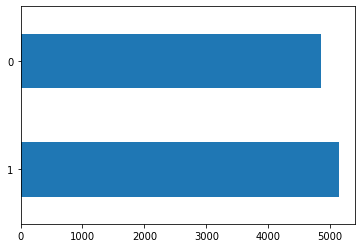

In [13]:
df.IsActiveMember.value_counts().plot(kind='barh');
df.IsActiveMember.value_counts()

Number of Active members is close to the number of inActive members

1    7055
0    2945
Name: HasCrCard, dtype: int64

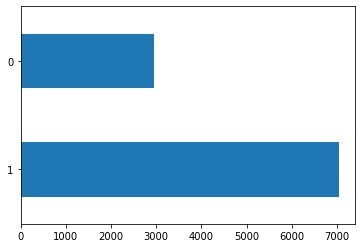

In [14]:
df.HasCrCard.value_counts().plot(kind='barh');
df.HasCrCard.value_counts()

Most of the bank customers have a credit card

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

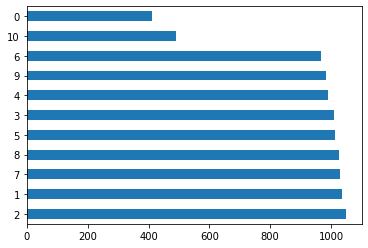

In [15]:
df.Tenure.value_counts().sort_values(ascending=False).plot(kind='barh');
df.Tenure.value_counts()

Tenure is the number of years the customer deal with the bank and 2 years in the most and 0 years then 10 years is the least

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

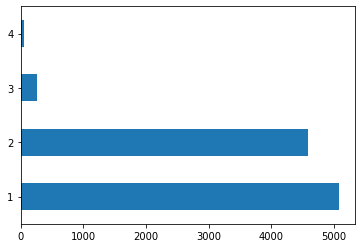

In [16]:
df.NumOfProducts.value_counts().sort_values(ascending=False).plot(kind='barh');
df.NumOfProducts.value_counts()

Most of the customers use from 1 to 2 products from the bank

0    7963
1    2037
Name: Exited, dtype: int64

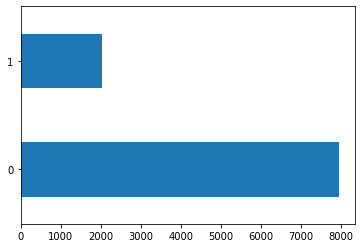

In [17]:
df.Exited.value_counts().sort_values(ascending=False).plot(kind='barh');
df.Exited.value_counts()

Most of the customers didn't exit from the bank but there are more than 2000 customers exit the bank 

<AxesSubplot:xlabel='Exited', ylabel='count'>

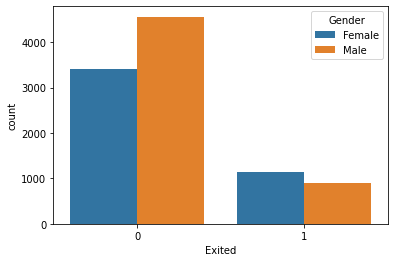

In [18]:
sns.countplot(x=df.Exited, hue=df.Gender)

The churn rate of Females is higher than that of Males

<AxesSubplot:xlabel='Exited', ylabel='count'>

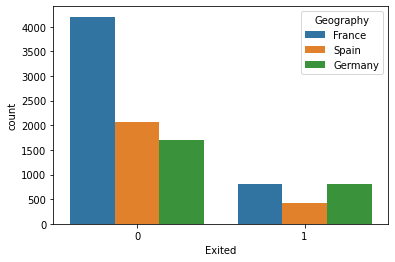

In [19]:
sns.countplot(x=df.Exited, hue=df.Geography)

Number of customers who leaves the bank in France and Germany are nearly equal and Spain is the least one 

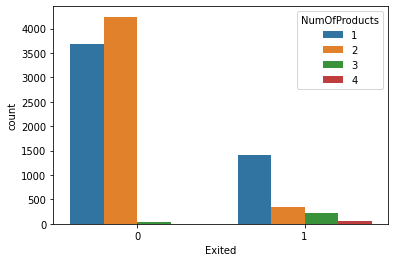

In [20]:
sns.countplot(x=df.Exited, hue=df.NumOfProducts);

We can say that Customers who use more than 2 products from the bank are less probable to leave it

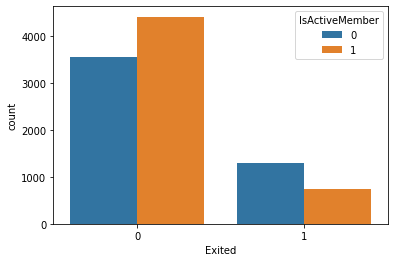

In [21]:
sns.countplot(x=df.Exited, hue=df.IsActiveMember);

Most of the customers who leave the bank are inactive members

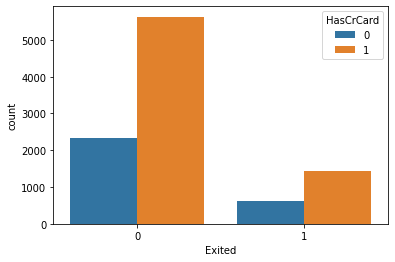

In [22]:
sns.countplot(x=df.Exited, hue=df.HasCrCard);

Most of the customers who leave the bank have a credit card

In [23]:
df[df.Exited ==1].Balance.describe()

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

In [24]:
df[df.Exited ==0].Balance.describe()

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

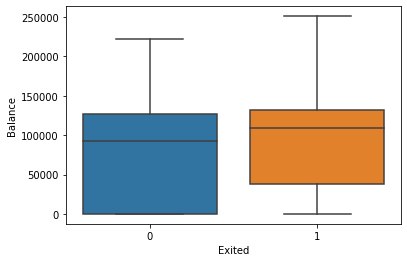

In [25]:
sns.boxplot(x=df.Exited,y=df.Balance)

it seems that customers with higher balance are more probable to leave the bank

In [26]:
df.loc[(df.Exited ==1) & (df.Gender=='Male')].Balance.mean()

93736.48374164812

In [27]:
df.loc[(df.Exited ==1) & (df.Gender=='Female')].Balance.mean()

89036.63935908691

The balance of Males customers who leave the bank is higher than that of females customers but the difference is not large

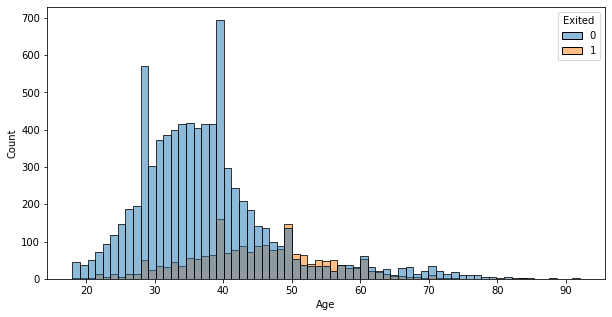

In [28]:
fig= plt.figure(figsize=(10,5))
sns.histplot(x="Age",hue="Exited",data=df);


Most of the customers who leave the bank are between 40 and 50 years

<AxesSubplot:>

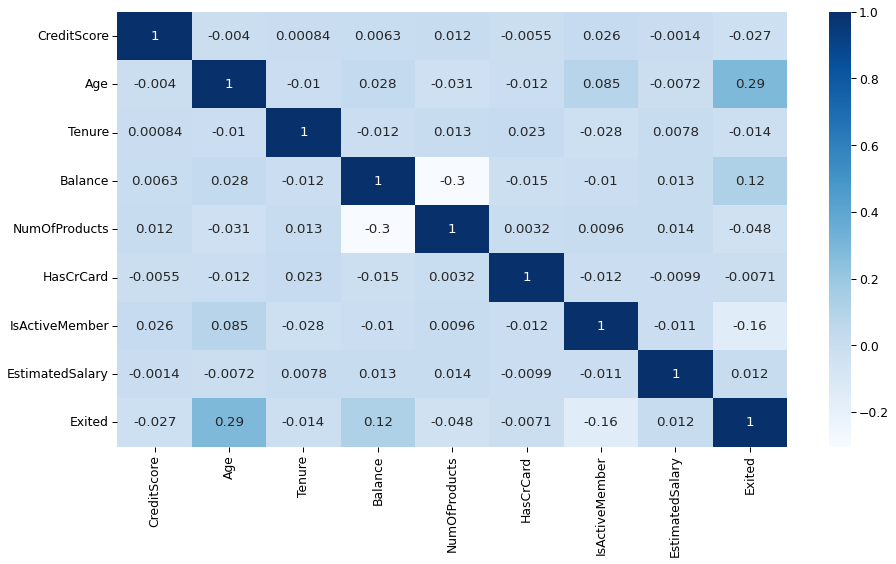

In [29]:
plt.figure(figsize=(15,8))
sns.set_context('paper',font_scale=1.4)

crash_matrix=df.corr()
#annot will show the numbers inside each colored box
sns.heatmap(crash_matrix,annot=True,cmap='Blues')

There is no considerable correlation between the attributes

<AxesSubplot:xlabel='Gender', ylabel='count'>

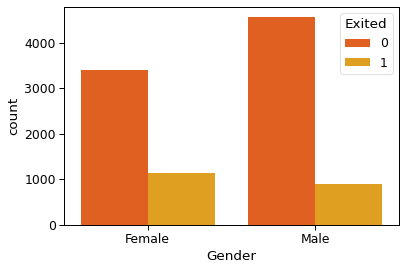

In [30]:
sns.countplot(x="Gender",hue="Exited",data=df,palette="autumn")


Balance of the Exited people is higher than that of the others

### Results

- Most of the customers didn't exit from the bank but there are more than 2000 customers exit the bank which is a large number

- The churn rate of Females is higher than that of Males

- Number of customers who leaves the bank in France and Germany are nearly equal and Spain is the least one

- We can say that Customers who use more than 2 products from the bank are less probable to leave it

- Most of the customers who leave the bank are inactive members

- Most of the customers who leave the bank have a credit card

- it seems that customers with higher balance are more probable to leave the bank

- The balance of Males customers who leave the bank is higher than that of females customers but the difference is not large

- Most of the customers ages who leave the bank are between 40 and 50 years

- There is no considerable correlation between the attributes

## Modeling

Our Main aim is to predict if the customer will leave the bank or not

### Data Preprocessing

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
X=df.iloc[:,:-1].values #All the rows except the last one
y=df.iloc[:,-1].values #Existed column

In [33]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [34]:
print(X.shape)

(10000, 10)


**Encoding categorical values**
- Geography
- Gender

Gender column

In [35]:
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2]) #all rows in Third column (Gender)

In [36]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


Geography column

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [38]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [39]:
X.shape

(10000, 12)

**Splitting the dataset into the Training set and Test set**

In [40]:
#With random_state=0 , we get the same train and test sets across different executions.
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=0)

**Feature Scaling**

we will apply feature scaling to all features as it's an important step in deep learning

In [41]:
sc = StandardScaler() #makes the range of variable from +3 to -3
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building the ANN

**intializing the ANN**

This artificial neural network variable will be created as an object of a certain class, and that certain class is the sequential class which allows exactly to build an artificial neural network, but as a sequence of layers as opposed to a computational graph.

Starting from the input layer and then successively we have the fully connected layers up to the final output layer.

In [42]:
ann =tf.keras.models.Sequential()

2022-07-01 06:08:04.999639: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


**Adding the input layer and the first hidden layer**

What is a Dense Layer in Neural Network?

The dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer. The dense layer is found to be the most commonly used layer in the models

In [43]:
#add is one the methods of Sequential class
#units is the number of neurons the hidden layer
#activation function of hidden layer in ANN is Relu
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

**Adding the second hidden layer**

In [44]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

**Adding the output layer**

In [45]:
#We need one neuron to get to the final prediction
#sigmoid returns probabilities
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

### Training the ANN

**Compiling the ANN**

We have to enter three parameters:

- The first one is the optimizer.

- Then the second one is to choose the loss function.

- And the third one is the metrics parameter because you can actually choose several metrics to evaluate your A and N at the same time
But we will only choose one and we will choose the accuracy.

In [46]:
#Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.
#so, we will update the weights using SGD
ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

**Training the ANN on the training set**

- The batch size is a number of samples processed before the model is updated.

- The number of epochs is the number of complete passes through the training dataset.

- The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

In [47]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

2022-07-01 06:08:06.039504: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5062 - accuracy: 0.7959
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7964
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7968
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.7990
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8035
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8138
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8175
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3881 - accura

**Predicting the method of a single observation**

Use our ANN model to predict if the customer with the following information will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?


In [48]:
#Any input in predict method is a 2D array
#predict method must be called with the same scaliing as the training
#sigmoid returns a probability so, use 0.5 as a threshold
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]])) > 0.5)

[[False]]


The ANN model predicts that the customer will not leave the bank

### Predicting the Test set results

In [49]:
y_pred=ann.predict(X_test)
y_pred = (y_pred >0.5)

In [50]:
y_pred.reshape(len(y_pred),1)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [51]:
y_test.reshape(len(y_test),1)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [52]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [53]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1505   90]
 [ 189  216]]


0.8605